# 03 - Python Finance

**Capitulo 03**: A partir das cotações de ações e do ÍNDICE BOVESPA do Yahoo Finance obtidas, podemos calcular a correlação entre o Dólar e o Índice Bovespa, também calcular o IBOVESPA dolarizado.

## 1. Importando bibliotecas

Instalando o YFinance


In [1]:
!pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 5.5MB 7.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=34962453207ea5eb9a9b2c83dcc15197c6289d7c002fa61e46c99c1cb700ab7c
  Stored in directory: /tmp/pip-ephem-wheel-cache-dw0zazdl/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


Importando o YFinance e sobrescrevendo os métodos do pandas_datareader

In [2]:
import yfinance as yf
yf.pdr_override()

Importando as Bibliotecas

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns

## 2. Obtendo e tratando os dados

Baixando as cotações do Yahoo Finance para o Índice Bovespa

In [7]:
tickers = ["^BVSP", "USDBRL=X"]
#carteira = web.get_data_yahoo(tickers)["Close"]
carteira = yf.download(tickers, start="2007-01-01")["Close"] #correlação

[*********************100%***********************]  2 of 2 completed


Exibindo as cotações mais antigas

In [5]:
carteira

,USDBRL=X,^BVSP
Date,,
1993-04-27,NaN,24.500000
1993-04-28,NaN,24.299999
1993-04-29,NaN,23.700001
1993-04-30,NaN,24.100000
1993-05-03,NaN,24.100000
...,...,...
2021-03-17,5.623400,116549.000000
2021-03-18,5.583100,114835.000000
2021-03-19,5.558700,116222.000000


In [8]:
carteira #correlação

,USDBRL=X,^BVSP
Date,,
2007-01-01,2.132500,NaN
2007-01-02,2.131000,45383.0000
2007-01-03,2.134500,44445.0000
2007-01-04,2.139000,44020.0000
2007-01-05,2.147000,42245.0000
...,...,...
2021-03-17,5.623400,116549.0000
2021-03-18,5.583100,114835.0000
2021-03-19,5.558700,116222.0000


In [9]:
carteira = carteira.dropna() #limpeza campos vazios
carteira

,USDBRL=X,^BVSP
Date,,
2007-01-02,2.131000,45383.0000
2007-01-03,2.134500,44445.0000
2007-01-04,2.139000,44020.0000
2007-01-05,2.147000,42245.0000
2007-01-08,2.146500,42830.0000
...,...,...
2021-03-17,5.623400,116549.0000
2021-03-18,5.583100,114835.0000
2021-03-19,5.558700,116222.0000


In [10]:
carteira.columns = ["DOLAR", "IBOV"]
carteira

,DOLAR,IBOV
Date,,
2007-01-02,2.131000,45383.0000
2007-01-03,2.134500,44445.0000
2007-01-04,2.139000,44020.0000
2007-01-05,2.147000,42245.0000
2007-01-08,2.146500,42830.0000
...,...,...
2021-03-17,5.623400,116549.0000
2021-03-18,5.583100,114835.0000
2021-03-19,5.558700,116222.0000


## 3. Resultados

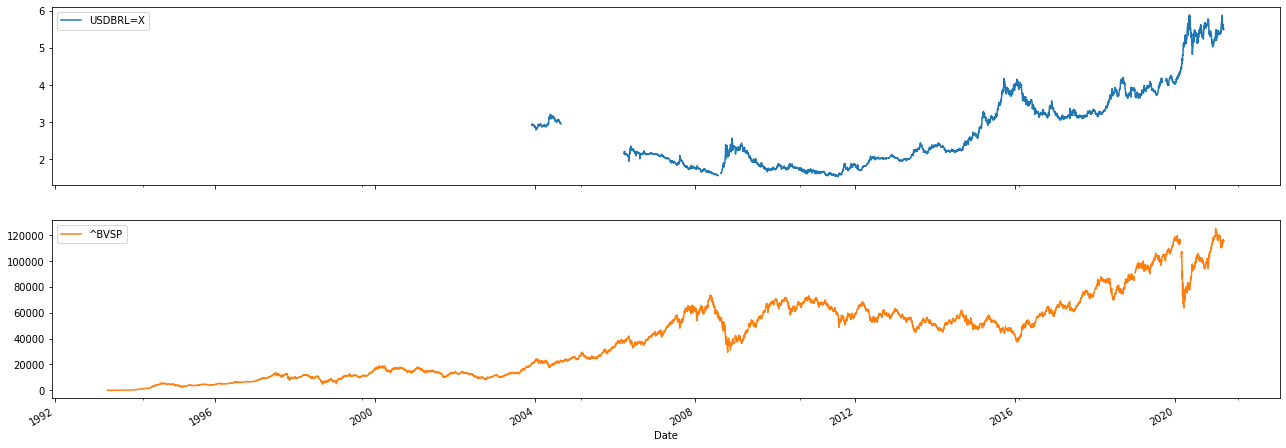

In [6]:
carteira.plot(subplots=True, figsize=(22,8));

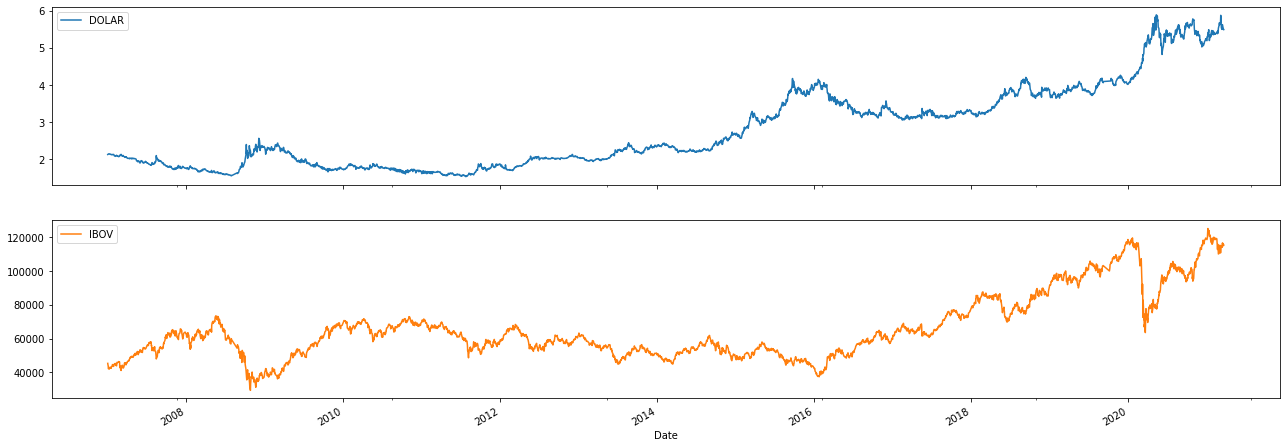

In [11]:
carteira.plot(subplots=True, figsize=(22,8)); #correlação

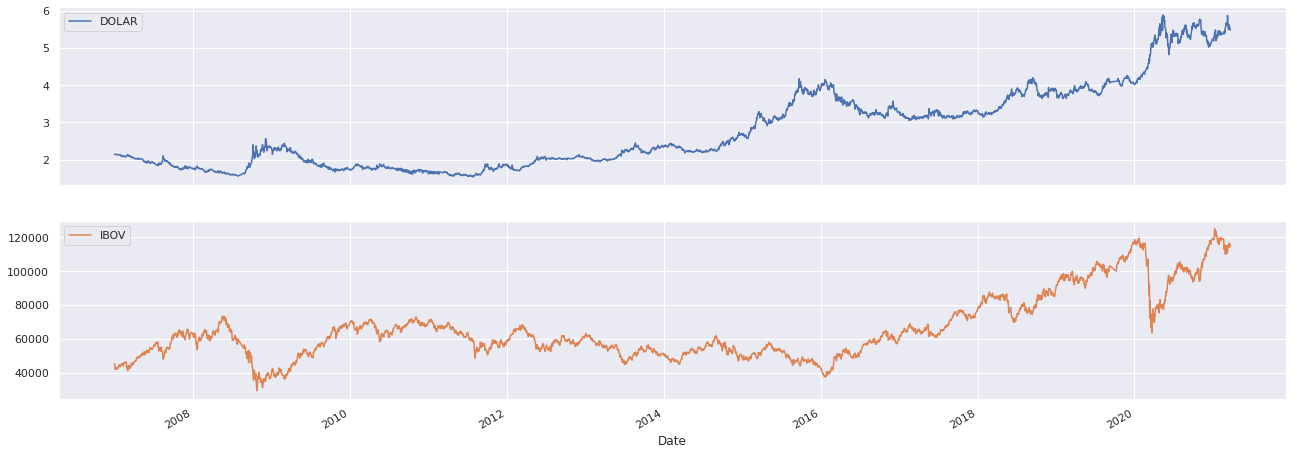

In [13]:
sns.set() #seaborn
carteira.plot(subplots=True, figsize=(22,8));

In [14]:
carteira.corr()

,DOLAR,IBOV
DOLAR,1.000000,0.630123
IBOV,0.630123,1.000000


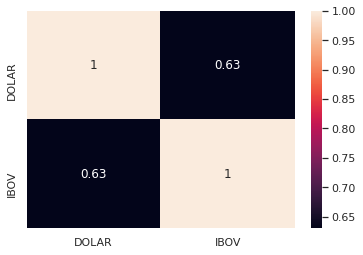

In [15]:
sns.heatmap(carteira.corr(), annot=True)

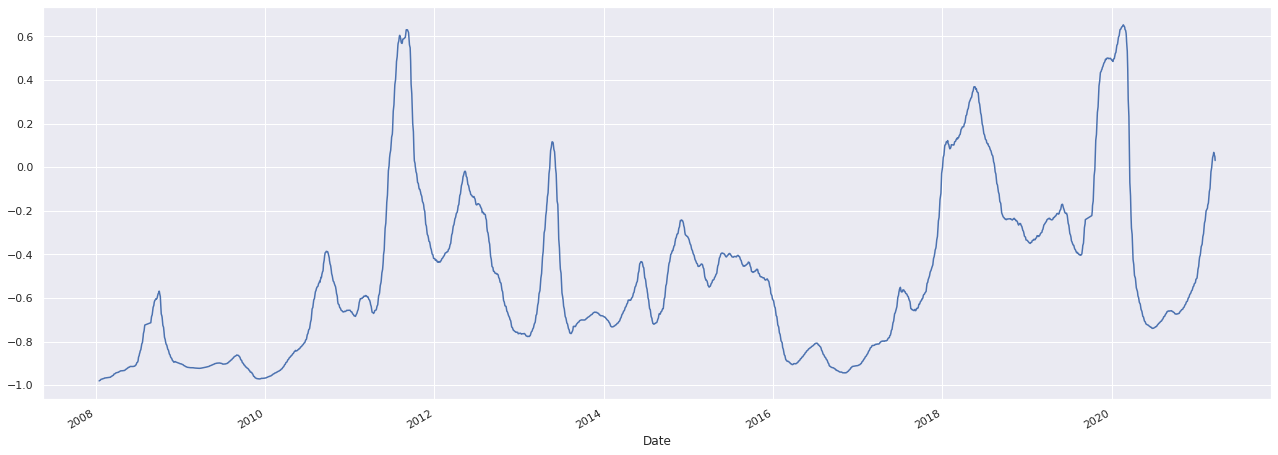

In [17]:
#janelas de observação de correlação
#a cada 252 dias do ano move a janela e calcula correlação
carteira["DOLAR"].rolling(252).corr(carteira["IBOV"]).plot(figsize=(22,8))

In [18]:
carteira["IBOV_DOLARIZADO"] = (carteira['IBOV'] / carteira["DOLAR"])
carteira

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DOLAR,IBOV,IBOV_DOLARIZADO
Date,,,
2007-01-02,2.131000,45383.0000,21296.573959
2007-01-03,2.134500,44445.0000,20822.206345
2007-01-04,2.139000,44020.0000,20579.710732
2007-01-05,2.147000,42245.0000,19676.291819
2007-01-08,2.146500,42830.0000,19953.411504
...,...,...,...
2021-03-17,5.623400,116549.0000,20725.716759
2021-03-18,5.583100,114835.0000,20568.322840
2021-03-19,5.558700,116222.0000,20908.125682


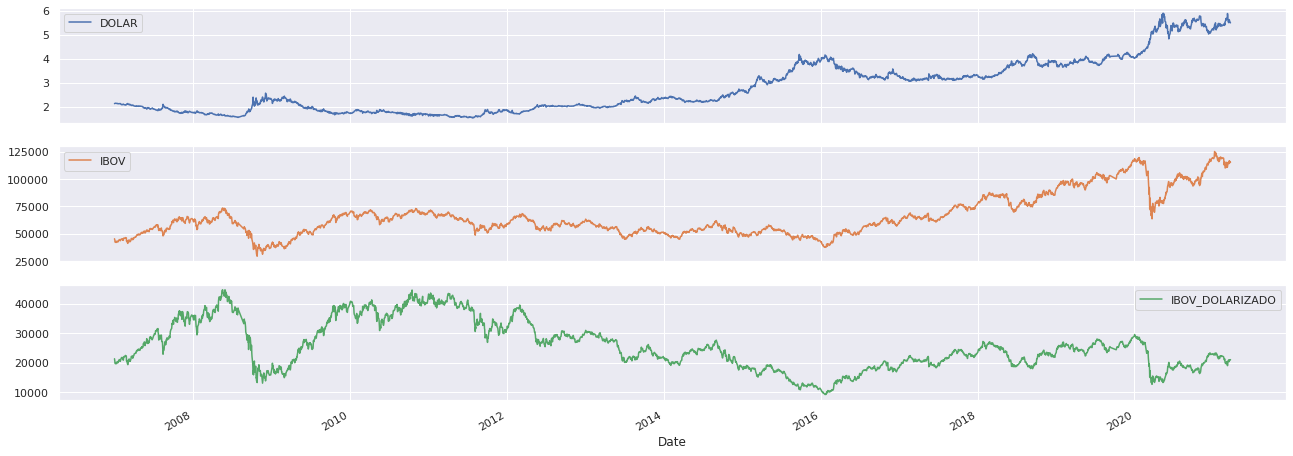

In [19]:
sns.set() #seaborn
carteira.plot(subplots=True, figsize=(22,8));

## 4. Análise

**Obtendo e tratando os dados**

In [20]:
tickers = "^BVSP USDBRL=X"
carteira = yf.download(tickers, start="2007-01-01")["Close"]

[*********************100%***********************]  2 of 2 completed


In [21]:
carteira

,USDBRL=X,^BVSP
Date,,
2007-01-01,2.132500,NaN
2007-01-02,2.131000,45383.0000
2007-01-03,2.134500,44445.0000
2007-01-04,2.139000,44020.0000
2007-01-05,2.147000,42245.0000
...,...,...
2021-03-17,5.623400,116549.0000
2021-03-18,5.583100,114835.0000
2021-03-19,5.558700,116222.0000


In [22]:
carteira = carteira.dropna()
carteira

,USDBRL=X,^BVSP
Date,,
2007-01-02,2.131000,45383.0000
2007-01-03,2.134500,44445.0000
2007-01-04,2.139000,44020.0000
2007-01-05,2.147000,42245.0000
2007-01-08,2.146500,42830.0000
...,...,...
2021-03-17,5.623400,116549.0000
2021-03-18,5.583100,114835.0000
2021-03-19,5.558700,116222.0000


In [23]:
carteira.columns = ["DOLAR", "IBOV"]
carteira

,DOLAR,IBOV
Date,,
2007-01-02,2.131000,45383.0000
2007-01-03,2.134500,44445.0000
2007-01-04,2.139000,44020.0000
2007-01-05,2.147000,42245.0000
2007-01-08,2.146500,42830.0000
...,...,...
2021-03-17,5.623400,116549.0000
2021-03-18,5.583100,114835.0000
2021-03-19,5.558700,116222.0000


**Resultados**

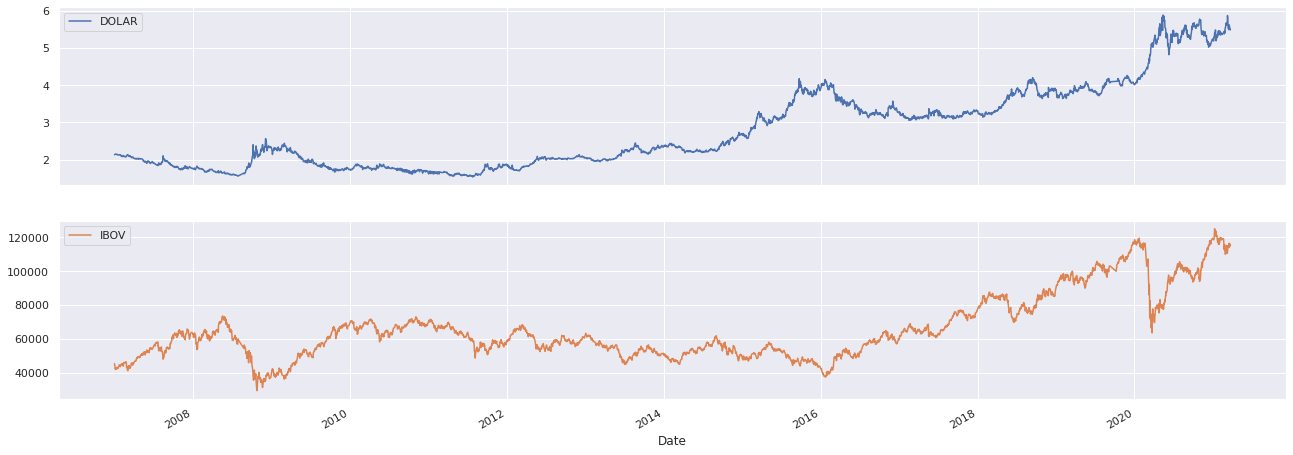

In [24]:
sns.set()
carteira.plot(subplots=True, figsize=(22,8));

In [25]:
retornos = carteira.pct_change()[1:]
retornos

,DOLAR,IBOV
Date,,
2007-01-03,0.001642,-0.020669
2007-01-04,0.002108,-0.009562
2007-01-05,0.003740,-0.040323
2007-01-08,-0.000233,0.013848
2007-01-09,0.001165,-0.019216
...,...,...
2021-03-17,0.001585,0.022189
2021-03-18,-0.007167,-0.014706
2021-03-19,-0.004370,0.012078


In [26]:
retornos.describe()

,DOLAR,IBOV
count,3459.000000,3459.000000
mean,0.000349,0.000436
std,0.012301,0.018197
min,-0.104792,-0.147797
25%,-0.005964,-0.008493
50%,0.000170,0.000689
75%,0.006426,0.009761
max,0.101524,0.146560


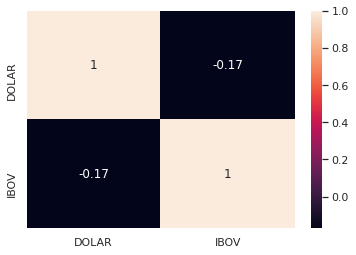

In [27]:
sns.heatmap(retornos.corr(), annot=True);

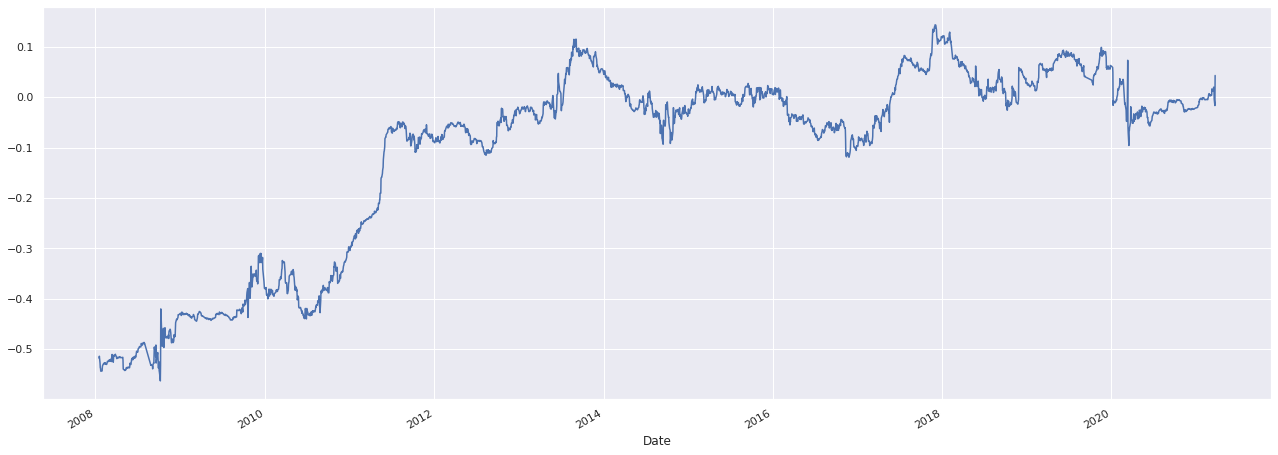

In [28]:
retornos["DOLAR"].rolling(252).corr(retornos["IBOV"]).plot(figsize=(22,8))

In [29]:
carteira["IBOV_DOLARIZADO"] = (carteira["IBOV"] / carteira["DOLAR"])
carteira

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DOLAR,IBOV,IBOV_DOLARIZADO
Date,,,
2007-01-02,2.131000,45383.0000,21296.573959
2007-01-03,2.134500,44445.0000,20822.206345
2007-01-04,2.139000,44020.0000,20579.710732
2007-01-05,2.147000,42245.0000,19676.291819
2007-01-08,2.146500,42830.0000,19953.411504
...,...,...,...
2021-03-17,5.623400,116549.0000,20725.716759
2021-03-18,5.583100,114835.0000,20568.322840
2021-03-19,5.558700,116222.0000,20908.125682


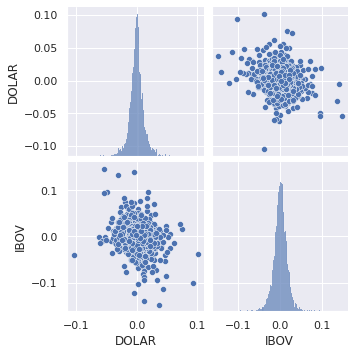

In [30]:
sns.pairplot(retornos);